## Installation

In [1]:
## Pip install method (recommended)
#!pip install ultralytics
#!pip install utils.plots


## Imports

In [2]:
#fundamental
import numpy
import utils

#OS and sys
import os


#Dispaly iamges
from PIL import Image
from IPython.display import display


#yolo
from ultralytics import YOLO
import torch

In [3]:
!nvidia-smi

Sun May 28 01:57:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    38W / 300W |      0MiB / 16384MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Define directory

In [4]:
# Define root directory
ROOT_PATH = os.path.normpath(os.getcwd() + os.sep + os.pardir)
print(ROOT_PATH)

/home/farid_javadnejad/power_line_inspection_yolov8


In [5]:
import torch
print(torch.cuda.is_available())

#GPU or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

True
cuda


In [6]:
print(torch.cuda.device_count())

1


## Train

In [7]:
#Data configs
data_yaml = ROOT_PATH + '/data/data.yaml'

#Modeling settings
imgsz = 768
batch_size = 32
epoch_size = 500
optimizer = 'SGD'       #optimizer to use, choices=['SGD', 'Adam', 'AdamW', 'RMSProp']
pretrained = True       #whether to use a pretrained model
lr0 = 0.01              #initial learning rate (i.e. SGD=1E-2, Adam=1E-3)
resume = False          #resume training from last checkpoint
momentum =0.937         #SGD momentum/Adam beta1
weight_decay = 0.0005   #optimizer weight decay 5e-4
patience = 50

#Pretrianed model configs
trained_model = 'yolov8m.pt'
    

model = YOLO(trained_model) 


#Train
results = model.train(mode='detect',
                      data=data_yaml,
                      epochs=epoch_size,
                      imgsz=imgsz,
                      batch=batch_size,
                      optimizer = optimizer,
                      pretrained = pretrained,
                      lr0 = lr0,
                      resume = resume,
                      device = 1,
                      weight_decay = weight_decay,
                      patience = patience)

Ultralytics YOLOv8.0.109 🚀 Python-3.11.3 torch-2.0.1+cu117 CUDA:1 (Tesla V100-SXM2-16GB, 16161MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/home/farid_javadnejad/power_line_inspection_yolov8/data/data.yaml, epochs=500, patience=50, batch=16, imgsz=768, save=True, save_period=-1, cache=False, device=1, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, 

      7/500      9.88G      1.434      2.047       1.51         31        768: 100%|██████████| 5/5 [00:01<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [0
                   all         15         42      0.337       0.46      0.398      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      8/500      9.85G      1.371      1.821      1.431         34        768: 100%|██████████| 5/5 [00:01<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [0
                   all         15         42      0.567      0.453      0.427       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      9/500       9.9G      1.343      1.636       1.36         38        768: 100%|██████████| 5/5 [00:01<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     28/500      9.95G      1.057     0.8909      1.177         28        768: 100%|██████████| 5/5 [00:01<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [0
                   all         15         42      0.702      0.362      0.354      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     29/500      9.87G      1.057     0.8697      1.157         29        768: 100%|██████████| 5/5 [00:01<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [0
                   all         15         42      0.873      0.287      0.412      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     30/500      9.88G       1.07     0.9738      1.136         40        768: 100%|██████████| 5/5 [00:01<00:00,
               

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [0
                   all         15         42       0.49      0.411      0.459      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     49/500      9.87G     0.9764     0.7824       1.12         29        768: 100%|██████████| 5/5 [00:01<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [0
                   all         15         42      0.682      0.332      0.477      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     50/500      9.92G     0.9003     0.6855      1.064         32        768: 100%|██████████| 5/5 [00:01<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [0
                   all         15         42      0.838      0.385      0.501       0.27

    

     69/500      9.86G      0.885     0.6797      1.084         35        768: 100%|██████████| 5/5 [00:01<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [0
                   all         15         42      0.578      0.536      0.553      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     70/500      9.94G     0.8569     0.6204      1.091         31        768: 100%|██████████| 5/5 [00:01<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [0
                   all         15         42      0.644      0.539      0.575      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     71/500      9.93G     0.9098     0.6574      1.082         34        768: 100%|██████████| 5/5 [00:01<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     90/500      9.89G     0.8594     0.6395      1.024         27        768: 100%|██████████| 5/5 [00:01<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [0
                   all         15         42      0.804      0.563      0.582      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     91/500       9.9G     0.8405     0.6337      1.068         31        768: 100%|██████████| 5/5 [00:01<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [0
                   all         15         42      0.818       0.53      0.551      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     92/500      9.98G     0.7975     0.6108       1.01         46        768: 100%|██████████| 5/5 [00:01<00:00,
               

Optimizer stripped from runs/detect/train7/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 52.0MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.0.109 🚀 Python-3.11.3 torch-2.0.1+cu117 CUDA:1 (Tesla V100-SXM2-16GB, 16161MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [0
                   all         15         42      0.657      0.614      0.609      0.408
              crossarm         15          5      0.749        0.6      0.554      0.226
               cutouts         15          1          0          0     0.0231    0.00463
             insulator         15         18      0.809      0.722      0.756      0.467
                  pole         15         16      0.857      0.749      0.718      0.496
          transformers         15          2      0.872          1      0.995      0.846
S

## Results

In [8]:
save_dir = ROOT_PATH + '/notebooks/'+ str(model.trainer.save_dir) + '/'
print(save_dir)

/home/farid_javadnejad/power_line_inspection_yolov8/notebooks/runs/detect/train7/


#################################### results.png ####################################


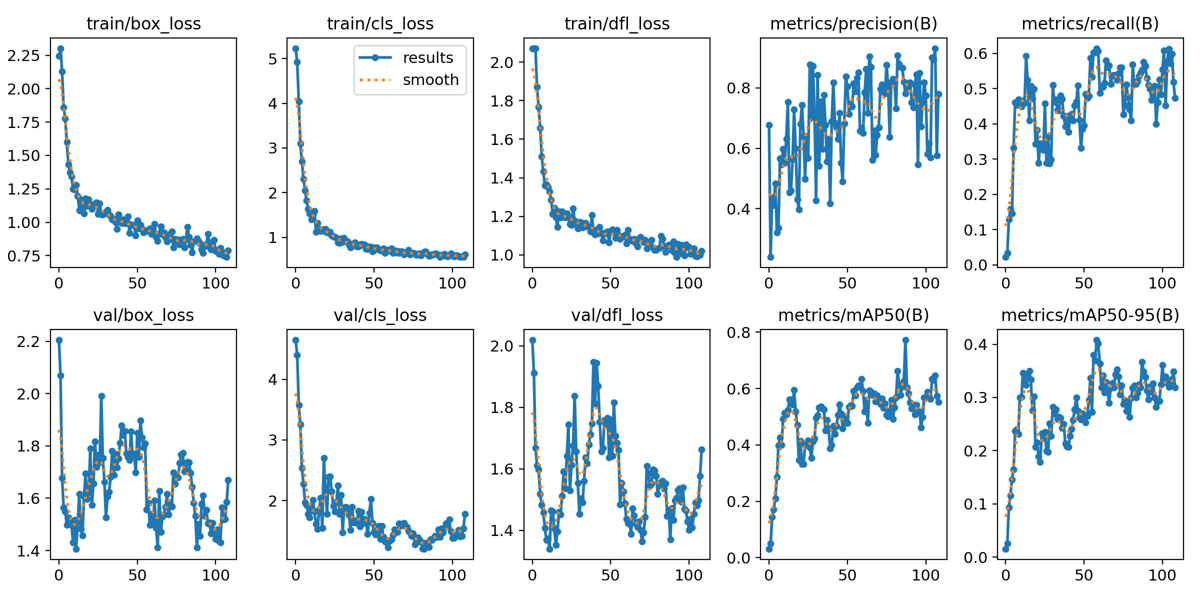

#################################### confusion_matrix_normalized.png ####################################


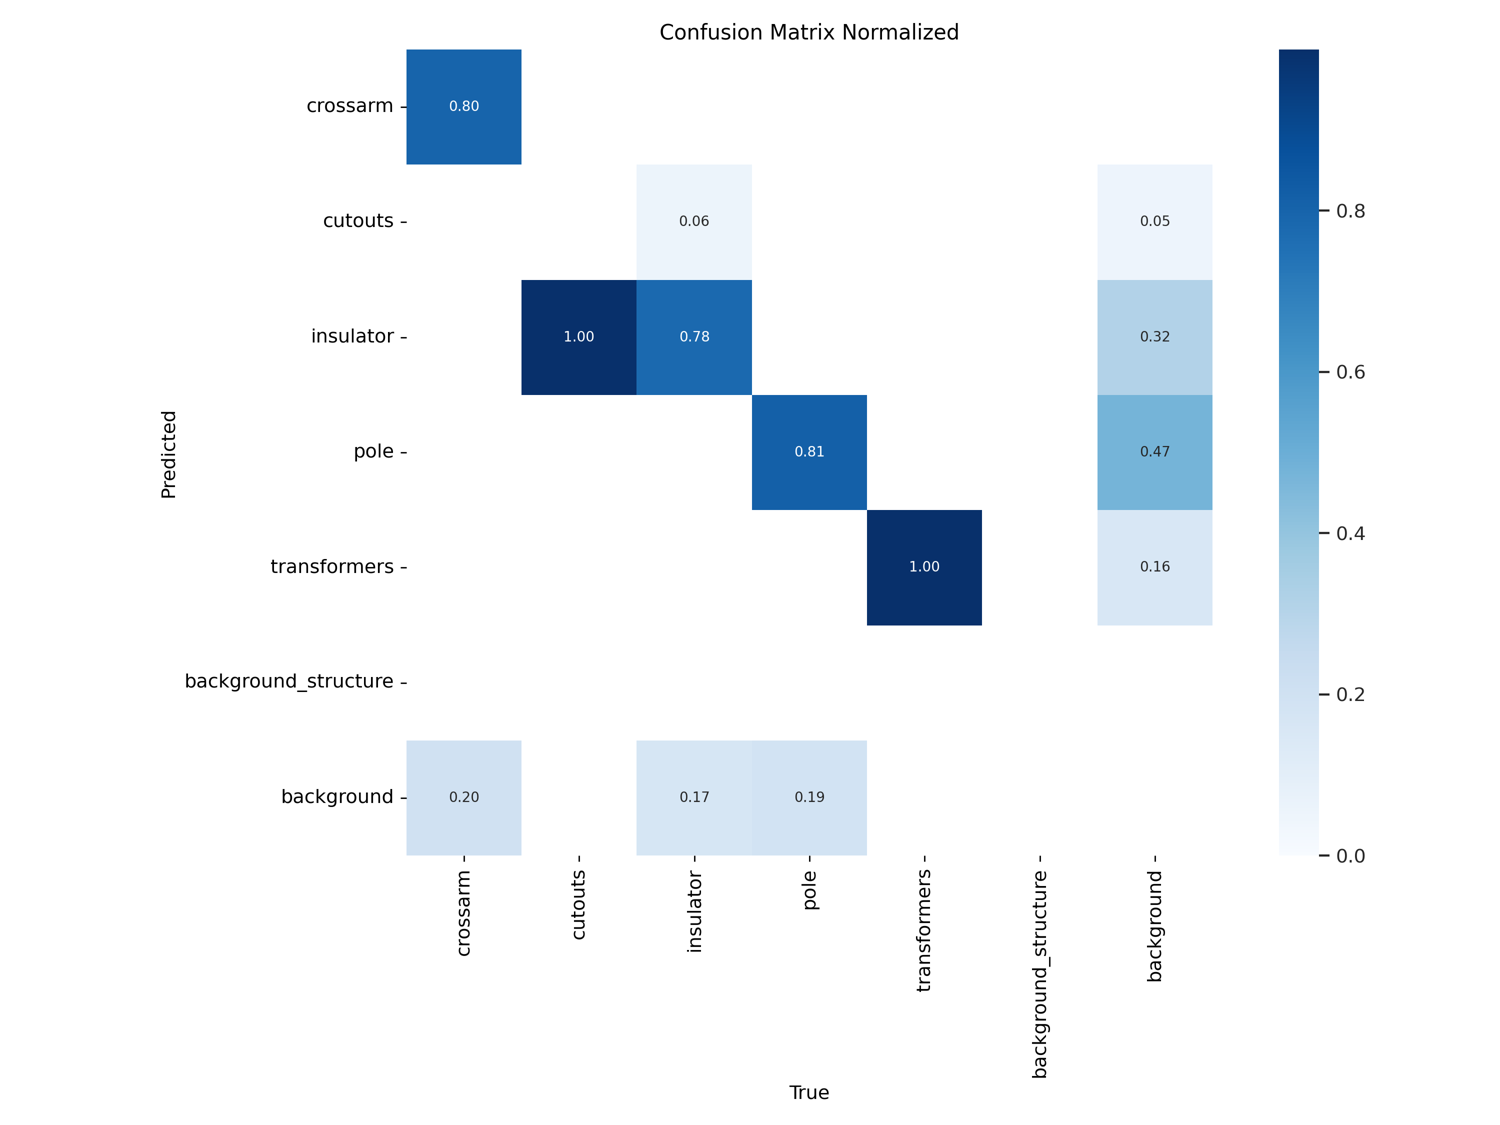

#################################### train_batch1.jpg ####################################


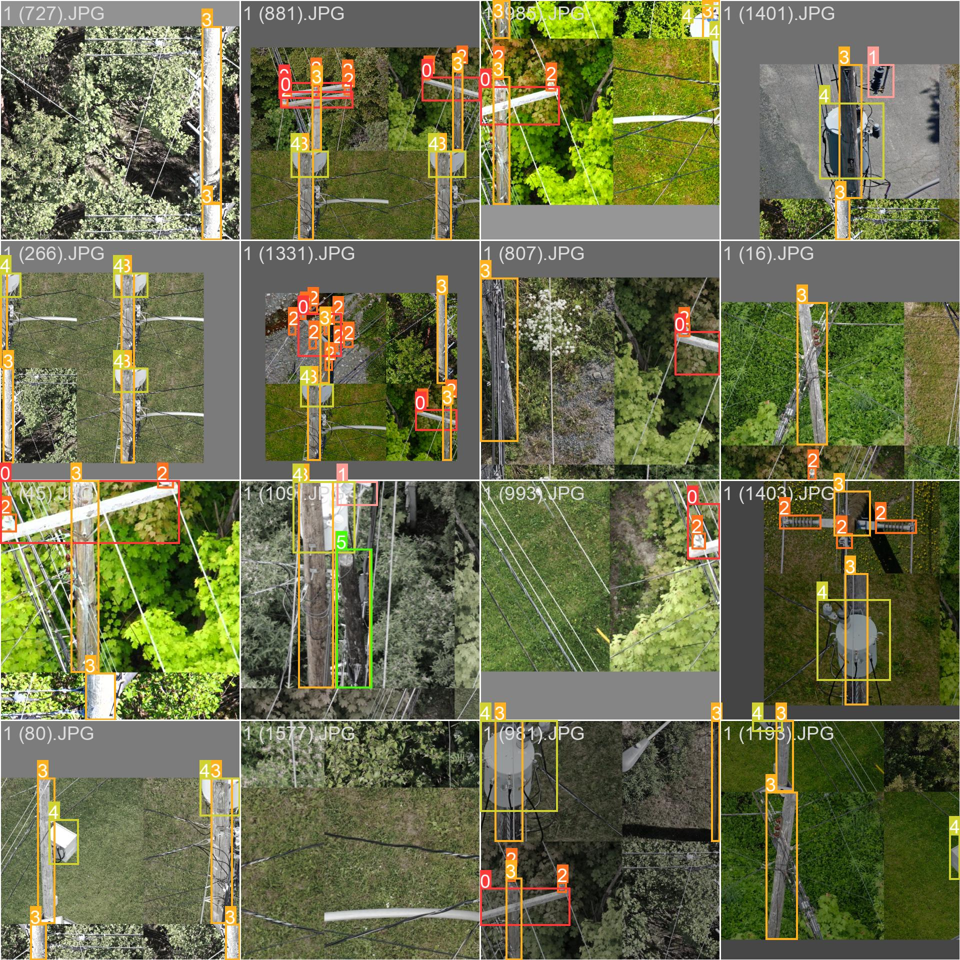

#################################### val_batch0_pred.jpg ####################################


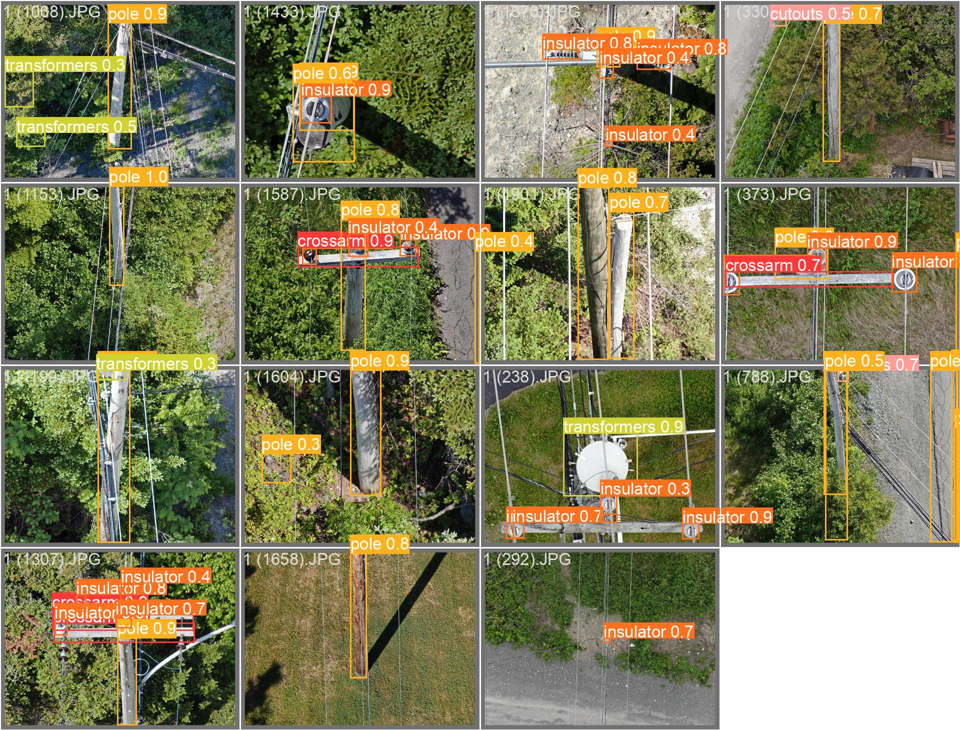

In [9]:
open_images =['results.png',
              'confusion_matrix_normalized.png',
              'train_batch1.jpg',
              'val_batch0_pred.jpg']

percentage = 50  # Resize by 50% (change this value as needed)

for img_open in open_images:
    
    print('#################################### ' + img_open + ' ####################################')
    
    image = Image.open(save_dir + img_open)
    
    # Calculate new width and height based on the percentage
    width, height = image.size
    new_width = int(width * (percentage / 100))
    new_height = int(height * (percentage / 100))
    
    # Resize the image while maintaining the aspect ratio
    resized_image = image.resize((new_width, new_height))
    display(resized_image)